In [70]:
# This is learning time-series data 
# one stock analysis - outcome should be comparable. 

In [71]:
# libraries 

from getData import get_data, get_ohlcv
from technical_indicator import LR, MACD, RSI, BB, ATR, ADX, RENKO, anomaly, historical_volatility, get_support_resistance_levels, VWAP
from Returns import cummulative_returns, CAGR, volatility, SHARPE, SORTINO, MAXDROWDOWN, CALMAR

import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd
import numpy as np
import datetime as dt
import copy

%load_ext autoreload
%autoreload 2
pd.set_option('mode.chained_assignment', None)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Getting Data

In [72]:

tickers = ['EXIDEIND.NS']
tickers

# ['RELIANCE.NS'
# ,
           
#            'TCS.NS', 'HDFCBANK.NS', 'BHARTIARTL.NS', 'ICICIBANK.NS', 'INFY.NS', 'SBIN.NS', 'HINDUNILVR.NS', 
#            'BAJFINANCE.NS',
#            'ITC.NS']
# '^NSEI', 

['EXIDEIND.NS']

In [73]:
# Store data in dictionary
ohlcv_dict = {}
for stock in tickers:
    ohlcv_dict[stock] = get_ohlcv(ticker=stock, period = '5y', interval='1d', multi_level_index=False)
    # ohlcv_dict[stock] = ohlcv_dict[stock].between_time('09:35', '16:00')

[*********************100%***********************]  1 of 1 completed


In [74]:
data = copy.deepcopy(ohlcv_dict)

## Analysis

In [75]:
data

{'EXIDEIND.NS':                  Close        High         Low        Open   Volume
 Date                                                               
 2020-06-01  168.150284  169.262575  158.865017  159.977308  4645035
 2020-06-02  165.055191  169.262581  164.426507  169.262581  2396925
 2020-06-03  163.459290  167.811756  161.573224  166.651101  2473046
 2020-06-04  165.732254  166.360938  160.219118  164.233068  2476908
 2020-06-05  167.473206  168.488784  164.910093  166.844522  2486048
 ...                ...         ...         ...         ...      ...
 2025-05-26  386.799988  387.649994  382.049988  383.899994  1154702
 2025-05-27  385.200012  388.500000  375.500000  387.299988  2910119
 2025-05-28  386.700012  388.700012  384.100006  385.200012  1728672
 2025-05-29  388.799988  390.350006  385.500000  388.600006  1776816
 2025-05-30  386.850006  390.200012  383.149994  388.799988  1888195
 
 [1240 rows x 5 columns]}

# cummulative Return

In [76]:

# def VWAP(data):
#     # Step 1: Calculate Typical Price (Series)
#     data['TP'] = (data['High'] + data['Low'] + data['Close']) / 3
    
#     # Step 2: Cumulative volume and cumulative price*volume
#     data['cum_vol'] = data['Volume'].cumsum()
#     data['cum_pv'] = (data['TP'] * data['Volume']).cumsum()
#     # data['cum_pv'] = np.multiply(data['TP'].values, data['Volume'].values).cumsum()
#     # Step 3: VWAP
#     data['VWAP'] = data['cum_pv'] / data['cum_vol']
#     return data['VWAP']

In [77]:
# def get_support_resistance_levels(data, order=14):
#     # Local minima as support
#     support_idx = argrelextrema(data['Low'].values, np.less_equal, order=order)[0]
#     support_levels = data['Low'].iloc[support_idx]

#     # Local maxima as resistance
#     resistance_idx = argrelextrema(data['High'].values, np.greater_equal, order=order)[0]
#     resistance_levels = data['High'].iloc[resistance_idx]

#     return support_levels, resistance_levels

In [78]:
# def historical_volatility(data, window=20):
#     # Rolling standard deviation
#     volatility = data['Log_Return'].rolling(window).std() * np.sqrt(252)  # annualized
#     data['volatility'] = volatility
#     return data['volatility']

In [88]:
def signal_logic(row):
    if (row['RSI'] < 30 and
        row['Close'] < row['LB'] and
        row['ATR'] > row['d_rtn'] and
        row['Volume'] > row['VWAP']):
        return 1  # Buy
    elif (row['RSI'] > 70 and
          row['Close'] > row['UB']):
        return -1  # Sell
    else:
        return 0  # Hold




In [79]:
for stock_name in tickers:
    cummulative_returns(data[stock_name])
    ATR(data[stock_name])
    anomaly(data[stock_name])
    support, resistnace  = get_support_resistance_levels(data[stock_name])
    data[stock_name]['support'] = support
    data[stock_name]['resistance'] = resistnace
    historical_volatility(data[stock_name])
    historical_volatility(data[stock_name])
    RSI(data[stock_name])
    VWAP(data[stock_name])
    BB(data[stock_name])
    print('--')

--


In [90]:
for stock_name in tickers:
    data[stock_name]['Signal'] = data[stock_name].apply(signal_logic, axis=1)

In [91]:
data

{'EXIDEIND.NS':                  Close        High         Low        Open   Volume     d_rtn  \
 Date                                                                            
 2020-06-01  168.150284  169.262575  158.865017  159.977308  4645035       NaN   
 2020-06-02  165.055191  169.262581  164.426507  169.262581  2396925 -0.018407   
 2020-06-03  163.459290  167.811756  161.573224  166.651101  2473046 -0.009669   
 2020-06-04  165.732254  166.360938  160.219118  164.233068  2476908  0.013905   
 2020-06-05  167.473206  168.488784  164.910093  166.844522  2486048  0.010505   
 ...                ...         ...         ...         ...      ...       ...   
 2025-05-26  386.799988  387.649994  382.049988  383.899994  1154702  0.012168   
 2025-05-27  385.200012  388.500000  375.500000  387.299988  2910119 -0.004136   
 2025-05-28  386.700012  388.700012  384.100006  385.200012  1728672  0.003894   
 2025-05-29  388.799988  390.350006  385.500000  388.600006  1776816  0.005431   
 

In [96]:
df = data['EXIDEIND.NS']
df

,Close,High,Low,Open,Volume,d_rtn,cum_rtn,r_mean,r_std2+,r_std2-,...,TP,cum_vol,cum_pv,VWAP,MB,STD,UB,LB,WIDTH,Signal
Date,,,,,,,,,,,,,,,,,,,,,
2020-06-01,168.150284,169.262575,158.865017,159.977308,4645035,NaN,NaN,NaN,NaN,NaN,...,165.425958,4645035,7.684094e+08,165.425958,NaN,NaN,NaN,NaN,NaN,0
2020-06-02,165.055191,169.262581,164.426507,169.262581,2396925,-0.018407,0.981593,NaN,NaN,NaN,...,166.248093,7041960,1.166894e+09,165.705795,NaN,NaN,NaN,NaN,NaN,0
2020-06-03,163.459290,167.811756,161.573224,166.651101,2473046,-0.009669,0.972102,NaN,NaN,NaN,...,164.281423,9515006,1.573169e+09,165.335586,NaN,NaN,NaN,NaN,NaN,0
2020-06-04,165.732254,166.360938,160.219118,164.233068,2476908,0.013905,0.985620,NaN,NaN,NaN,...,164.104103,11991914,1.979640e+09,165.081226,NaN,NaN,NaN,NaN,NaN,0
2020-06-05,167.473206,168.488784,164.910093,166.844522,2486048,0.010505,0.995973,NaN,NaN,NaN,...,166.957361,14477962,2.394704e+09,165.403382,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-26,386.799988,387.649994,382.049988,383.899994,1154702,0.012168,2.300323,2.235639,2.418435,2.052843,...,385.499990,4590748163,1.274434e+12,277.609127,380.217854,9.336360,398.890574,361.545135,37.345439,0
2025-05-27,385.200012,388.500000,375.500000,387.299988,2910119,-0.004136,2.290808,2.239772,2.420686,2.058859,...,383.066671,4593658282,1.275548e+12,277.675935,380.871427,9.341983,399.555394,362.187460,37.367934,0
2025-05-28,386.700012,388.700012,384.100006,385.200012,1728672,0.003894,2.299729,2.243222,2.425284,2.061159,...,386.500010,4595386954,1.276216e+12,277.716872,382.717856,7.593240,397.904336,367.531377,30.372959,0


In [101]:
df.loc[df['Signal']==True]

,Close,High,Low,Open,Volume,d_rtn,cum_rtn,r_mean,r_std2+,r_std2-,...,TP,cum_vol,cum_pv,VWAP,MB,STD,UB,LB,WIDTH,Signal
Date,,,,,,,,,,,,,,,,,,,,,
2021-08-09,164.976013,169.078448,164.096928,168.834256,4379009,-0.017738,0.981122,1.042765,1.121764,0.963765,...,166.050463,1165134445,2.026522e+11,173.930336,171.328497,3.079776,177.488048,165.168945,12.319103,1
2021-08-10,163.315506,166.734192,161.166621,165.757424,4220594,-0.010065,0.971247,1.039628,1.126681,0.952575,...,163.738773,1169355039,2.033433e+11,173.893551,170.550570,3.588106,177.726782,163.374357,14.352425,1
2021-12-20,151.643143,155.696722,149.054715,155.696722,2939176,-0.028473,0.901831,0.988916,1.127212,0.850620,...,152.131526,1558178574,2.715802e+11,174.293366,160.772428,3.498073,167.768575,153.776282,13.992293,1
2022-02-14,154.375046,160.008447,153.782065,159.217806,3533761,-0.046107,0.918078,1.001138,1.081563,0.920714,...,156.055186,1682553399,2.924292e+11,173.800859,166.840295,4.565788,175.971871,157.708719,18.263151,1
2022-02-24,139.747971,148.198081,138.858492,145.282550,4633642,-0.075515,0.831090,0.978460,1.141405,0.815516,...,142.268181,1701470196,2.952880e+11,173.548718,156.732888,7.035946,170.804780,142.660997,28.143782,1
2022-06-20,130.309540,135.992360,128.728227,135.053447,1961598,-0.031227,0.774959,0.843158,0.912601,0.773715,...,131.676709,1853553901,3.178269e+11,171.468949,141.777541,5.048005,151.873551,131.681531,20.192020,1
2024-08-05,485.350006,502.600006,481.250000,490.000000,5562811,-0.046183,2.886406,3.279971,3.661512,2.898430,...,489.733337,3976512502,1.008988e+12,253.736947,534.834590,19.816031,574.466653,495.202528,79.264125,1
2024-08-06,481.649994,500.649994,479.799988,488.049988,3256185,-0.007623,2.864402,3.262115,3.699976,2.824253,...,487.366659,3979768687,1.010575e+12,253.928099,529.628132,23.235184,576.098500,483.157765,92.940735,1
2025-01-10,389.100006,398.000000,386.600006,397.450012,3238458,-0.021009,2.314001,2.587477,3.003928,2.171026,...,391.233337,4358910879,1.189268e+12,272.836102,413.178571,10.277776,433.734123,392.623020,41.111103,1


In [81]:
# # Calculate the mean and standard deviation 1 for return and plot it. 
# def return_analysis(data):
#     data['r_mean'] = data['ICICIBANK.NS']['cum_rtn'].rolling(30).mean().plot()
#     data['r_std2+'] = (2* data['ICICIBANK.NS']['cum_rtn'].rolling(30).std() + data['ICICIBANK.NS']['cum_rtn'].rolling(30).mean())
#     data['r_std2-'] = (-2* data['ICICIBANK.NS']['cum_rtn'].rolling(30).std() + data['ICICIBANK.NS']['cum_rtn'].rolling(30).mean())

In [82]:
# import matplotlib.pyplot as plt
# plt.figure(figsize=(12,9))
# for key in tickers:
#     plt.plot(data[key]['Close'], label = key)
# plt.legend()
# plt.show()

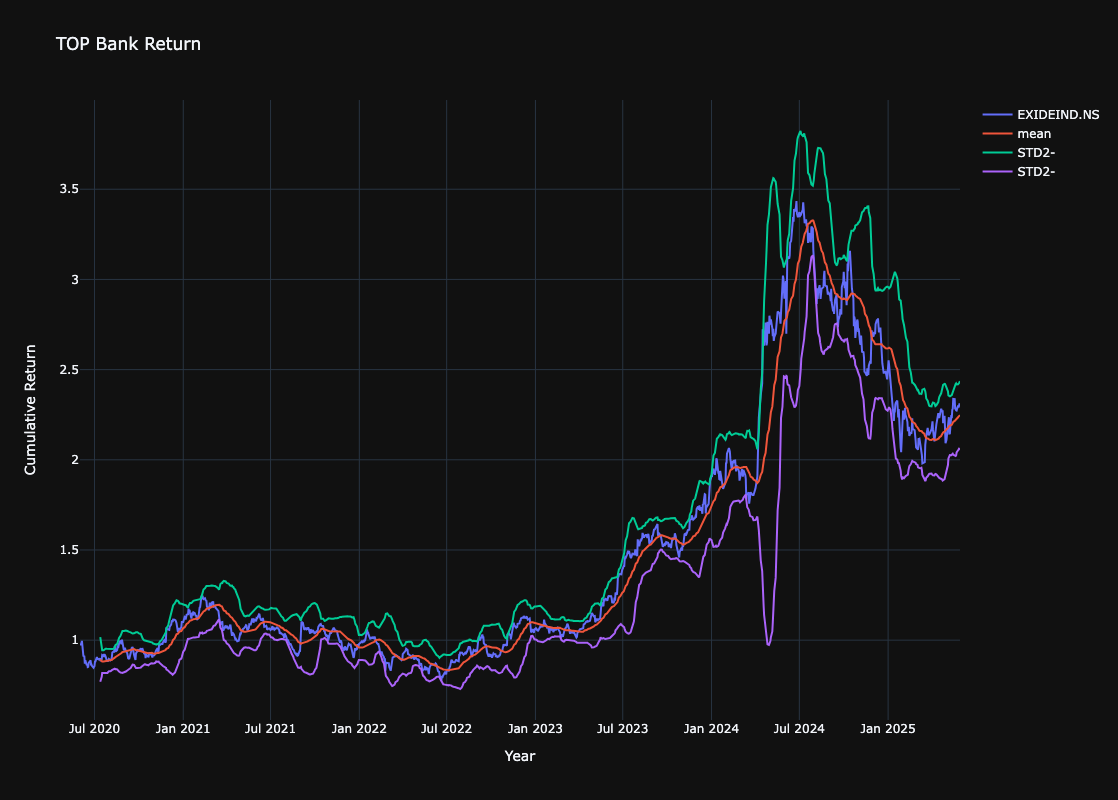

In [83]:
# Create a line chart
import plotly.graph_objects as go
fig = go.Figure()

# Add multiple lines (traces) to the figure
for key in data:
    fig.add_trace(go.Scatter(
        x=data[key].index,
        y=data[key]['cum_rtn'],
        # y1=data[key]['r_mean'],
        mode='lines',  # Set the mode to 'lines' for a line chart
        name=key# Use the name for each line from the dictionary
    ))

for key in data:
    fig.add_trace(go.Scatter(
        x=data[key].index,
        # y=data[key]['cum_rtn'],
        y=data[key]['r_mean'],
        mode='lines',  # Set the mode to 'lines' for a line chart
        name='mean'# Use the name for each line from the dictionary
    ))

for key in data:
    fig.add_trace(go.Scatter(
        x=data[key].index,
        # y=data[key]['cum_rtn'],
        y=data[key]['r_std2+'],
        mode='lines',  # Set the mode to 'lines' for a line chart
        name='STD2-'# Use the name for each line from the dictionary
    ))
for key in data:
    fig.add_trace(go.Scatter(
        x=data[key].index,
        # y=data[key]['cum_rtn'],
        y=data[key]['r_std2-'],
        mode='lines',  # Set the mode to 'lines' for a line chart
        name='STD2-'# Use the name for each line from the dictionary
    ))   
# Customize the layout
fig.update_layout(
    title="TOP Bank Return",
    xaxis_title="Year",
    yaxis_title="Cumulative Return",
    autosize=False,
    width=1100,
    height=800,
    template='plotly_dark'
)

# Show the plot
fig.show()